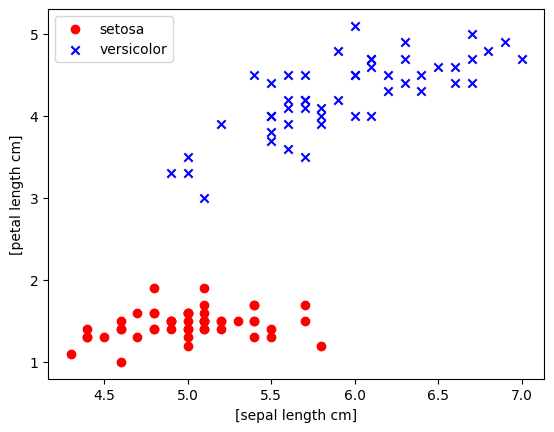

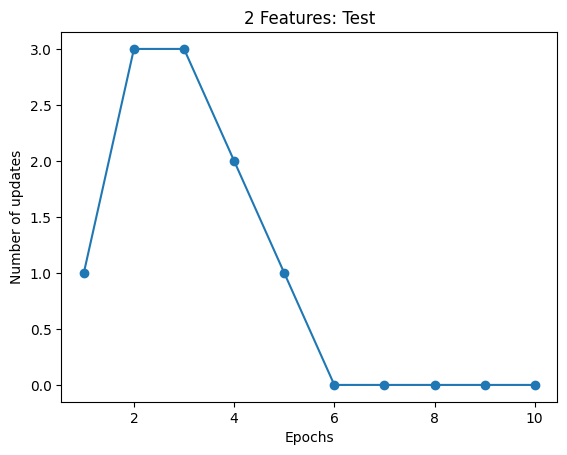

C:\Users\payge\AppData\Local\Temp\ipykernel_25088\3910964668.py:104: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


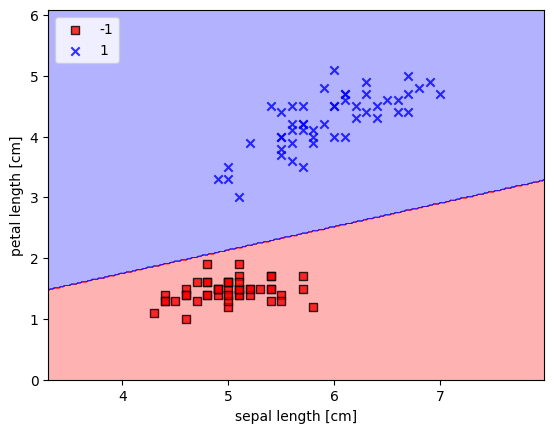

'\nfor num in range(2,5): #the number of datapoints you want to use.\n#dataPath = os.path.join(os.curdir, "Assignment 1", "iris.data")\n    X,y = get_data(\n        \'C:\\Users\\payge\\OneDrive\\Desktop\\Grad School\\2023\\2023 Fall\\ML\\Environments\\Assignment 1\\iris.data\',\n        num,\n        True\n    )\n'

In [4]:
"""
NOTE: num = the number of datapoints you want to use.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight  
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        """
        Parameters
        -----------
        eta: learning rate
        n_iter: Epoch
        """
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of  
          examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, 
                              size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            #decision_graph(X,y,self)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

def plot_decision_regions(X, y, classifier, resolution=0.02):
  '''
  Description:
  Parameters:

  Return:
  '''

  # setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  #colors = ("red","blue", "lightgreen", 'gray', 'cyan')
  colors = ["red","blue", "lightgreen", 'gray', 'cyan']
  cmap = ListedColormap(colors[:len(np.unique(y))])
  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, resolution), 
    np.arange(x2_min, x2_max, resolution))
  
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  #plt.contourf(xx1, xx2, Z, alpha=0.3, colors=colors)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  # plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(
      x=X[y == cl, 0],
      y=X[y == cl, 1], 
      alpha=0.8, 
      c=colors[idx], 
      marker=markers[idx], 
      label=cl, 
      edgecolor='black'
    )
         
def perceptron_training(X,y, eta=0.1, n_iter=10):
  '''
  Description:
  Parameters:

  Return:
  '''
  ppn = Perceptron(eta, n_iter)
  ppn.fit(X, y)
  plt.plot(range(1, len(ppn.errors_) + 1), 
          ppn.errors_, marker='o')
  plt.xlabel('Epochs')
  plt.ylabel('Number of updates')
  plt.title(f"{num} Features: Test")
  plt.show()
  return ppn

def get_data(datapath, num, seperable):

    df = pd.read_csv(datapath, header=None, encoding='utf-8')

    if seperable == True:
      if num == 2:
        y = df.iloc[0:100, 4].values
        y = np.where(y == "Iris-setosa", -1, 1)
        X = df.iloc[0:100, [0,2]].values
        graph_datapoints2D(X, "[sepal length cm]", "[petal length cm]")
        ppn = perceptron_training(X,y)
        decision_graph(X,y,ppn)
        return X,y

      if num == 3:
          y = df.iloc[0:100, 4].values
          y = np.where(y == "Iris-setosa", -1, 1)
          X = df.iloc[0:100, [0,1,2]].values
          perceptron_training(X,y)
          return X,y
      
      if num == 4:
          y = df.iloc[0:100, 4].values
          y = np.where(y == "Iris-setosa", -1, 1)
          X = df.iloc[0:100, [0,1,2,3]].values
          perceptron_training(X,y)
          return X,y
      
def decision_graph(X,y,ppn):
  plot_decision_regions(X, y, classifier=ppn)
  plt.xlabel('sepal length [cm]')
  plt.ylabel('petal length [cm]')
  plt.legend(loc='upper left')
  plt.show()

def graph_datapoints2D(X, xlabel, ylabel):
  plt.scatter(
    X[:50, 0], 
    X[:50, 1],
    color='red',
    marker='o',
    label='setosa'
  )

  plt.scatter(
    X[50:100, 0],
    X[50:100, 1],
    color='blue',
    marker='x',
    label='versicolor'
  )

  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend(loc='upper left')
  plt.show()

num = 2
#dataPath = os.path.join(os.curdir, "Assignment 1", "iris.data")
X,y = get_data(
        'C:\\Users\\payge\\OneDrive\\Desktop\\Grad School\\2023\\2023 Fall\\ML\\Environments\\Assignment 1\\iris.data',
        num,
        True
    )
'''
for num in range(2,5): #the number of datapoints you want to use.
#dataPath = os.path.join(os.curdir, "Assignment 1", "iris.data")
    X,y = get_data(
        'C:\\Users\\payge\\OneDrive\\Desktop\\Grad School\\2023\\2023 Fall\\ML\\Environments\\Assignment 1\\iris.data',
        num,
        True
    )
'''